In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from newsapi import NewsApiClient
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import re
current_directory = os.getcwd()

#topics = ['gun ownership', 'mass shooting', 'hunting', 'second amendment','freedom']

pos_topics = [
    'Self-defense', 'Second Amendment rights', 'personal freedom', 'home protection', 'sport shooting', 'hunting'
]

neg_topics = [
    'Gun violence', 'mass shootings', 'accidental shootings', 'crime', 'suicide', 'gun control', 'public safety'
]

topics = pos_topics + neg_topics

In [3]:
non_related_topics = ['ice-cream','honey','flowers','simming','library','snow']

In [3]:
from nltk.stem import WordNetLemmatizer 
LEMMER = WordNetLemmatizer() 

from nltk.stem.porter import PorterStemmer
STEMMER=PorterStemmer()

def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [STEMMER.stem(word) for word in words]
    return words

def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [LEMMER.lemmatize(word) for word in words]
    return words

In [7]:
print(current_directory)

/home/akhil/CUB/Spring 2023/TM/TM_project/part3


In [3]:
topics

['Self-defense',
 'Second Amendment rights',
 'personal freedom',
 'home protection',
 'sport shooting',
 'hunting',
 'Gun violence',
 'mass shootings',
 'accidental shootings',
 'crime',
 'suicide',
 'gun control',
 'public safety']

In [2]:
newsapi = NewsApiClient(api_key='76acda18a67042c3b2e0568a00b9d8cf')


In [3]:
from GoogleNews import GoogleNews
googlenews = GoogleNews(lang='en', region='US',start='01/01/2023',end='02/01/2023')

In [9]:
all_google_results = []
all_google_labels = []
for topic in topics:
    all_articles = newsapi.get_everything(q=topic,
                                      page_size=100)
    corpus_directory = os.path.join(current_directory, "corpus")
    if not os.path.exists(corpus_directory):
        os.makedirs(corpus_directory)
    corpus_directory = os.path.join(corpus_directory, topic)
    if not os.path.exists(corpus_directory):
        os.makedirs(corpus_directory)
    file_count = 0
    for article in all_articles['articles']:
        description = article['description']
        if description:
            all_google_results.append(description)
        file_count += 1
        filename= topic+str(file_count)+".txt"
        MyFile=open(corpus_directory + "/" + filename,"w+")
        MyFile.write(description or "")
        MyFile.close()
    googlenews.get_news(topic)
    google_results = googlenews.get_texts()
    all_google_results.extend(google_results)
    #all_google_labels.extend([topic]*len(google_results))
    
    o_file_count = 0
    for article in google_results:
        if o_file_count == 200:
            break
        description = article
        file_count += 1
        o_file_count+= 1
        filename= topic+str(file_count)+".txt"
        MyFile=open(corpus_directory + "/" + filename,"w+")
        MyFile.write(description or "")
        MyFile.close()

https://news.google.com/search?q=Self-defense&hl=en
https://news.google.com/search?q=Second%2BAmendment%2Brights&hl=en
https://news.google.com/search?q=personal%2Bfreedom&hl=en
https://news.google.com/search?q=home%2Bprotection&hl=en
https://news.google.com/search?q=sport%2Bshooting&hl=en
https://news.google.com/search?q=hunting&hl=en
https://news.google.com/search?q=Gun%2Bviolence&hl=en
https://news.google.com/search?q=mass%2Bshootings&hl=en
https://news.google.com/search?q=accidental%2Bshootings&hl=en
https://news.google.com/search?q=crime&hl=en
https://news.google.com/search?q=suicide&hl=en
https://news.google.com/search?q=gun%2Bcontrol&hl=en
https://news.google.com/search?q=public%2Bsafety&hl=en


In [6]:
from sklearn.model_selection import train_test_split

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer


2023-05-02 11:57:07.945337: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-02 11:57:07.945357: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [53]:
# Set the path to the directory containing the subdirectories of text files
directory_path = "/home/akhil/CUB/Spring 2023/TM/TM_project/part3/corpus"

# Create an empty list to store the data from each file
data = []

# Iterate through each subdirectory in the main directory
for subdir in os.listdir(directory_path):
    subdir_path = os.path.join(directory_path, subdir)
    
    # Iterate through each file in the subdirectory
    for file in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, file)
        
        # Read the contents of the file
        with open(file_path, "r") as f:
            contents = f.read()
        
        # Append the data to the list along with the label (subdirectory name)
        data.append((subdir, contents))
        
# Convert the list to a DataFrame
df_topics = pd.DataFrame(data, columns=["Label", "Post"])

In [54]:
df_topics

,Label,Post
0,Self-defense,Attorneys argue soccer complex shooting was ac...
1,Self-defense,"Town by Town: food bank road show, mother-daug..."
2,Self-defense,'Thought police': Hunterdon Central school boa...
3,Self-defense,What is a 'Second Amendment Sanctuary'? Pocono...
4,Self-defense,Jorge Masvidal recommends celebrity lawyer for...
...,...,...
3860,public safety,"Fumio Kishida said Japan must ""maximise"" secur..."
3861,public safety,Gov. Ron DeSantis signed a bill Monday that el...
3862,public safety,Understanding the origin and evolutions of the...
3863,public safety,State's high court shoots down man's claim of ...


In [55]:
df_topics.to_csv("./combined_all_data.csv")

In [12]:
pos_topics = [
    'Self-defense', 'Second Amendment rights', 'personal freedom', 'home protection', 'sport shooting', 'hunting'
]

neg_topics = [
    'Gun violence', 'mass shootings', 'accidental shootings', 'crime', 'suicide', 'gun control', 'public safety'
]

In [13]:
df_topics["Label"] = df_topics["Label"].apply(lambda x: 1 if x in pos_topics else 0)


In [138]:
df_topics

,Label,Post
0,1,Opinion | Germany needs to follow Japan's lead...
1,1,"80-Year-Old Man Accused of Killing Son, Says I..."
2,1,Missouri: Committee Hearing Public Transit Sel...
3,1,New Mexico State men's basketball has suspende...
4,1,The man's lawyer believes he should go to a me...
...,...,...
2531,0,We outline the panel’s conclusions regarding t...
2532,0,"The ad was created by The Dawn Project, an org..."
2533,0,No one hurt in ‘unplanned’ explosion of 250kg ...
2534,0,As trial opens in Santa Fe DJ's shooting death...


In [14]:
X = df_topics['Post']
Y = df_topics['Label']
sentences = X.values


In [17]:
MyTokenizer = Tokenizer(num_words=20000)
MyTokenizer.fit_on_texts(sentences)

print(MyTokenizer.word_index)

{'the': 1, 'in': 2, 'to': 3, 'a': 4, 'of': 5, 'self': 6, 'defense': 7, 'and': 8, 'for': 9, 'amendment': 10, 'second': 11, 'on': 12, 'gun': 13, 'is': 14, 'shooting': 15, 'that': 16, 'with': 17, 'are': 18, 'was': 19, 'rights': 20, 'after': 21, 'it': 22, 'from': 23, 'at': 24, 'man': 25, 'who': 26, 'by': 27, 'as': 28, 'bill': 29, 'an': 30, 'has': 31, 'have': 32, 'new': 33, 'says': 34, 'be': 35, 'his': 36, 'he': 37, 'li': 38, 'court': 39, 'about': 40, 'but': 41, 'can': 42, 'guns': 43, 'shot': 44, 'claims': 45, 'law': 46, 'assault': 47, 'not': 48, 'police': 49, 'been': 50, 'woman': 51, 'over': 52, 'state': 53, 'county': 54, 'what': 55, 'laws': 56, 'say': 57, 'their': 58, 'public': 59, 'governor': 60, 'year': 61, 'this': 62, 'more': 63, 'people': 64, 'they': 65, 'class': 66, 'will': 67, 'into': 68, 'news': 69, 'house': 70, 'classes': 71, 'carry': 72, 'safety': 73, 'first': 74, 'school': 75, '–': 76, 'said': 77, 'shootings': 78, 'protect': 79, 'signs': 80, '…': 81, 'murder': 82, 'out': 83, 'ma

In [18]:
AllData= MyTokenizer.texts_to_sequences(sentences)
vocab_size = len(MyTokenizer.word_index) + 1  
print(vocab_size)

8566


In [19]:
y = Y.values

In [20]:
from keras_preprocessing.sequence import pad_sequences


In [21]:
maxlen = 600

AllData = pad_sequences(AllData, padding='post', maxlen=maxlen)
print(AllData[0, :]) ## Row 0 and all columns
print(AllData)
print(type(y))
print(y[0])

[681 376 864 682  15  19 183   5   6   7   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [22]:
print(AllData.shape)

(3865, 600)


In [23]:
MySample=np.random.choice(3865, size=1200, replace=False, p=None)
print(MySample)

TestingData=[]
TrainingData=[]
TrainingLabels=[]
TestingLabels=[]

for i in range(0,3865):
    #print(i)
    if i in MySample:
        TestingData.append(AllData[i])
        TestingLabels.append(y[i])
    else:
        TrainingData.append(AllData[i])
        TrainingLabels.append(y[i])
 

[1430 2834 2747 ... 2534   25  126]


In [24]:
TestingData=np.array(TestingData)
print(TestingData)
print(len(TestingData))
print(TestingLabels)
print(len(TestingLabels))

TrainingData=np.array(TrainingData)
print(TrainingData)
print(len(TrainingData))
print(TrainingLabels)
print(len(TrainingLabels))

[[   2 2750  775 ...    0    0    0]
 [4075 2182 4076 ...    0    0    0]
 [ 154  109  162 ...    0    0    0]
 ...
 [1011 1012  522 ...    0    0    0]
 [ 363    1  820 ...    0    0    0]
 [  21  788   15 ...    0    0    0]]
1200
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [25]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    #print(embedding_matrix.shape)

    with open(filepath, encoding='UTF-8') as f: ## You MUST specify the encoding!
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                #print(word)
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix


In [27]:
GlovePath="/home/akhil/CUB/Spring 2023/TM/TM_project/part3/glove.6B/glove.6B.300d.txt"

In [28]:
embedding_dim = 300 ## Because we are using glove.6B.300d.txt
embedding_matrix = create_embedding_matrix(GlovePath, MyTokenizer.word_index, embedding_dim)
print(type(embedding_matrix))
print(embedding_matrix[0])

<class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
TheWord=list(filter(lambda x: MyTokenizer.word_index[x] == 1, MyTokenizer.word_index))[0]
print(TheWord)
print("Word: ",TheWord, "\nEmbedding: ", embedding_matrix[1])

TheWord=list(filter(lambda x: MyTokenizer.word_index[x] == 25, MyTokenizer.word_index))[0]
print("Word: ",TheWord, "\nEmbedding: ", embedding_matrix[25])

the
Word:  the 
Embedding:  [ 4.65600006e-02  2.13180006e-01 -7.43639981e-03 -4.58539993e-01
 -3.56389992e-02  2.36430004e-01 -2.88360000e-01  2.15210006e-01
 -1.34859994e-01 -1.64129996e+00 -2.60910004e-01  3.24340016e-02
  5.66210002e-02 -4.32960019e-02 -2.16719992e-02  2.24759996e-01
 -7.51290023e-02 -6.70180023e-02 -1.42470002e-01  3.88250016e-02
 -1.89510003e-01  2.99769998e-01  3.93049985e-01  1.78870007e-01
 -1.73429996e-01 -2.11779997e-01  2.36169994e-01 -6.36809990e-02
 -4.23180014e-01 -1.16609998e-01  9.37540010e-02  1.72959998e-01
 -3.30729991e-01  4.91120011e-01 -6.89949989e-01 -9.24620032e-02
  2.47419998e-01 -1.79910004e-01  9.79079977e-02  8.31179991e-02
  1.52989998e-01 -2.72760004e-01 -3.89339998e-02  5.44529974e-01
  5.37370026e-01  2.91049987e-01 -7.35139987e-03  4.78800014e-02
 -4.07599986e-01 -2.67590005e-02  1.79189995e-01  1.09770000e-02
 -1.09630004e-01 -2.63949990e-01  7.39900023e-02  2.62360007e-01
 -1.50800005e-01  3.46230000e-01  2.57580012e-01  1.19709998e-

In [30]:
nonzero_Emb_Vectors = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_Emb_Vectors / vocab_size  


0.8342283446182582

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [39]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], ## Our Glove Embeddings
                           input_length=1200, 
                           trainable=False))  ## You can put True here as well to train the 
                                              ## embeddings.  
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1200, 300)         2569800   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 300)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,572,821
Trainable params: 3,021
Non-trainable params: 2,569,800
_________________________________________________________________


In [34]:
print(type(TrainingData))
print(type(TrainingLabels))
## !! The labels need to be an array!
TrainingLabels=np.array(TrainingLabels)
print(type(TrainingLabels))

print(type(TestingData))
print(type(TestingLabels))
TestingLabels=np.array(TestingLabels)
print(type(TestingLabels))


<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [35]:
TrainingLabels

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
history = model.fit(TrainingData, TrainingLabels,
                    epochs=50,
                    verbose=True,
                    validation_data=(TestingData, TestingLabels),
                    batch_size=10)

Epoch 1/50
267/267 [==============================] - 6s 21ms/step - loss: 0.4744 - accuracy: 0.6927 - val_loss: 0.7554 - val_accuracy: 0.5200
Epoch 2/50
267/267 [==============================] - 6s 21ms/step - loss: 0.4719 - accuracy: 0.6942 - val_loss: 0.7782 - val_accuracy: 0.4892
Epoch 3/50
267/267 [==============================] - 6s 21ms/step - loss: 0.4801 - accuracy: 0.6833 - val_loss: 0.7531 - val_accuracy: 0.4875
Epoch 4/50
267/267 [==============================] - 6s 22ms/step - loss: 0.4720 - accuracy: 0.6841 - val_loss: 0.7668 - val_accuracy: 0.4633
Epoch 5/50
267/267 [==============================] - 6s 22ms/step - loss: 0.4711 - accuracy: 0.6912 - val_loss: 0.7931 - val_accuracy: 0.5067
Epoch 6/50
267/267 [==============================] - 6s 22ms/step - loss: 0.4734 - accuracy: 0.6938 - val_loss: 0.7880 - val_accuracy: 0.4867
Epoch 7/50
267/267 [==============================] - 6s 22ms/step - loss: 0.4704 - accuracy: 0.6968 - val_loss: 0.8147 - val_accuracy: 0.4833

In [45]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 0.7088
Testing Accuracy:  0.4675


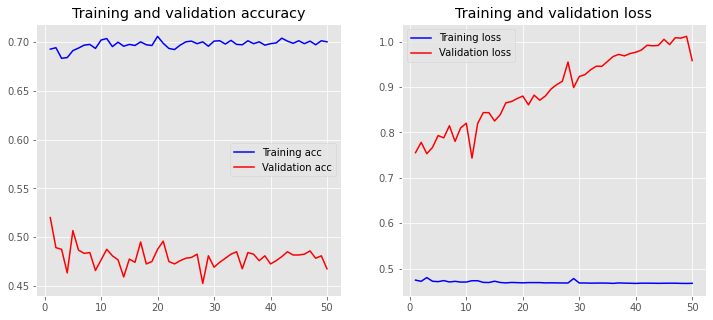

In [46]:
loss, accuracy = model.evaluate(TrainingData, TrainingLabels, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(TestingData, TestingLabels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [49]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=600))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 600, 100)          856600    
                                                                 
 conv1d_2 (Conv1D)           (None, 596, 128)          64128     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 922,029
Trainable params: 922,029
Non-trainable params: 0
________________________________________________

In [50]:
history = model.fit(TrainingData, TrainingLabels,
                    epochs=10,
                    verbose=True,
                    validation_data=(TestingData, TestingLabels),
                    batch_size=10)

Epoch 1/10
267/267 [==============================] - 6s 23ms/step - loss: 0.6934 - accuracy: 0.5265 - val_loss: 0.6916 - val_accuracy: 0.5308
Epoch 2/10
267/267 [==============================] - 6s 24ms/step - loss: 0.6775 - accuracy: 0.5591 - val_loss: 0.6919 - val_accuracy: 0.4900
Epoch 3/10
267/267 [==============================] - 6s 22ms/step - loss: 0.6152 - accuracy: 0.6349 - val_loss: 0.7040 - val_accuracy: 0.5050
Epoch 4/10
267/267 [==============================] - 6s 21ms/step - loss: 0.5341 - accuracy: 0.6664 - val_loss: 0.7061 - val_accuracy: 0.4958
Epoch 5/10
267/267 [==============================] - 6s 21ms/step - loss: 0.5039 - accuracy: 0.6747 - val_loss: 0.6958 - val_accuracy: 0.5467
Epoch 6/10
267/267 [==============================] - 6s 21ms/step - loss: 0.4929 - accuracy: 0.6803 - val_loss: 0.7316 - val_accuracy: 0.5567
Epoch 7/10
267/267 [==============================] - 15s 57ms/step - loss: 0.4838 - accuracy: 0.6837 - val_loss: 0.7314 - val_accuracy: 0.510

84/84 [==============================] - 1s 9ms/step - loss: 0.4682 - accuracy: 0.7069
Training Accuracy: 0.7069
38/38 [==============================] - 0s 10ms/step - loss: 0.7810 - accuracy: 0.5008
Testing Accuracy:  0.5008


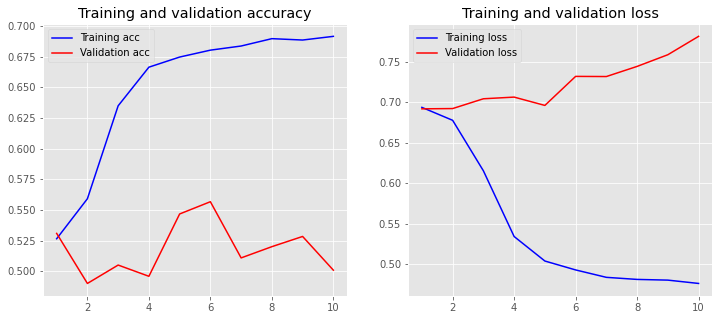

In [51]:
loss, accuracy = model.evaluate(TrainingData, TrainingLabels, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(TestingData, TestingLabels, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)